# Imports

In [1]:
import numpy as np
import pandas as pd
import pyshark
import matplotlib.pyplot as plt
import json # original json library
import logging

### Log setup

In [2]:
LOG_FILENAME = '/home/benjamin/Folders_Python/Cyber/logs/logfile.log'
LOG_FORMAT = '%(asctime)% -- %(name)s -- %(levelname)s -- %(message)s'
# LOG_LEVEL = logging.INFO

# specific logger for the module
logger = logging.getLogger(__name__)   # creates specific logger for the module
logger.setLevel(logging.DEBUG)    # entry level of messages from all handlers
LOG_FORMAT = '%(asctime)s -- %(name)s -- %(levelname)s -- %(message)s'
formatter = logging.Formatter(LOG_FORMAT)

# file handler to log everything
file_handler = logging.FileHandler(LOG_FILENAME, mode='w')
file_handler.setLevel(logging.DEBUG)  # all messages (DEBUG and up) get logged in the file
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

# stream handler to show messages to the console
console = logging.StreamHandler()
console.setLevel(logging.WARNING)  # Warning messages and up get displayed to the console
console.setFormatter(formatter)
logger.addHandler(console)

# start your engine
logger.info("-------- new run traitement dataframes--------")

### Load dataframe

In [53]:
DIRDATAFRAMES = '/home/benjamin/Folders_Python/Cyber/data/dataframes/'
dfname = 'test.pcap.pkl'

In [54]:
filename = DIRDATAFRAMES + dfname
df = pd.read_pickle(filename)

In [55]:
df

,ETH_dst,ETH_src,ETH_type,IP_version,IP_hdr_len,IP_len,IP_id,IP_flags,IP_ttl,IP_proto,...,TCP_time_delta,TCP_payload,TIMESTAMP_ts,UDP_srcport,UDP_dstport,UDP_length,UDP_stream,UDP_time_relative,UDP_time_delta,UDP_payload
0,00:1f:f3:3c:e1:13,f8:1e:df:e5:84:3a,0x00000800,4,20,79,0x0000de53,0x00000040,64,6,...,0.000000000,15:03:01:00:16:43:1a:88:1e:fa:7a:bc:22:6e:e6:3...,2010-07-07 05:16:19.466743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00:1f:f3:3c:e1:13,f8:1e:df:e5:84:3a,0x00000800,4,20,52,0x00004c05,0x00000040,64,6,...,0.000722000,None,2010-07-07 05:16:19.467465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,f8:1e:df:e5:84:3a,00:1f:f3:3c:e1:13,0x00000800,4,20,52,0x0000ab4f,0x00000000,54,6,...,0.020855000,None,2010-07-07 05:16:19.488320,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00:1f:f3:3c:e1:13,f8:1e:df:e5:84:3a,0x00000800,4,20,52,0x0000fc17,0x00000040,64,6,...,0.000049000,None,2010-07-07 05:16:19.488369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f8:1e:df:e5:84:3a,00:1f:f3:3c:e1:13,0x00000800,4,20,52,0x0000ab50,0x00000000,54,6,...,0.000958000,None,2010-07-07 05:16:19.489327,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,00:1f:f3:3c:e1:13,f8:1e:df:e5:84:3a,0x00000800,4,20,64,0x00002235,0x00000000,255,17,...,NaN,NaN,2010-07-07 05:16:22.196084,51145,53,44,11,0.000000000,0.000000000,d6:23:01:00:00:01:00:00:00:00:00:00:05:67:61:6...
137,f8:1e:df:e5:84:3a,00:1f:f3:3c:e1:13,0x00000800,4,20,80,0x0000c195,0x00000000,64,17,...,NaN,NaN,2010-07-07 05:16:22.202223,53,56758,60,10,0.016440000,0.016440000,e1:b6:81:80:00:01:00:01:00:00:00:00:05:67:61:6...
138,f8:1e:df:e5:84:3a,00:1f:f3:3c:e1:13,0x00000800,4,20,64,0x0000c196,0x00000000,64,17,...,NaN,NaN,2010-07-07 05:16:22.214655,53,51145,44,11,0.018571000,0.018571000,d6:23:81:80:00:01:00:00:00:00:00:00:05:67:61:6...
139,f8:1e:df:e5:84:3a,00:1f:f3:3c:e1:13,0x00000800,4,20,83,0x0000c197,0x00000000,64,17,...,NaN,NaN,2010-07-07 05:16:22.246264,53,57360,63,9,0.070082000,0.070082000,02:05:81:80:00:01:00:01:00:00:00:00:08:66:65:6...


In [56]:
df.describe(include='all').transpose()

/tmp/ipykernel_4181/4214053870.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all').transpose()


,count,unique,top,freq,first,last
ETH_dst,141,3,00:1f:f3:3c:e1:13,70,NaT,NaT
ETH_src,141,2,00:1f:f3:3c:e1:13,71,NaT,NaT
ETH_type,141,2,0x00000800,140,NaT,NaT
IP_version,140,1,4,140,NaT,NaT
IP_hdr_len,140,1,20,140,NaT,NaT
IP_len,140,34,52,46,NaT,NaT
IP_id,140,137,0x00000000,4,NaT,NaT
IP_flags,140,2,0x00000040,102,NaT,NaT
IP_ttl,140,5,64,70,NaT,NaT
IP_proto,140,3,6,106,NaT,NaT


In [57]:
df.columns

Index(['ETH_dst', 'ETH_src', 'ETH_type', 'IP_version', 'IP_hdr_len', 'IP_len',
       'IP_id', 'IP_flags', 'IP_ttl', 'IP_proto', 'IP_src', 'IP_dst',
       'TCP_srcport', 'TCP_dstport', 'TCP_stream', 'TCP_len', 'TCP_seq',
       'TCP_ack', 'TCP_hdr_len', 'TCP_flags', 'TCP_time_relative',
       'TCP_time_delta', 'TCP_payload', 'TIMESTAMP_ts', 'UDP_srcport',
       'UDP_dstport', 'UDP_length', 'UDP_stream', 'UDP_time_relative',
       'UDP_time_delta', 'UDP_payload'],
      dtype='object')

### Features recast sur dataframe

In [58]:
# transforms variables into right type

columns_to_encode_as_ordinal = ['ETH_dst', 'ETH_src', 'ETH_type', 'IP_id', 'IP_flags', 'IP_src', 'IP_dst', 'TCP_flags']

columns_to_cast_as_float = ['IP_version', 'IP_hdr_len', 'IP_len', 'IP_ttl', 'IP_proto',
                            'TCP_srcport', 'TCP_dstport', 'TCP_stream', 'TCP_len', 'TCP_seq',
                            'TCP_ack', 'TCP_hdr_len', 'TCP_time_relative', 'TCP_time_delta',
                            'UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream',
                            'UDP_time_relative', 'UDP_time_delta'
                            ]

columns_to_cast_as_datetime = ['TIMESTAMP_ts']

columns_to_discard = ['TCP_payload','UDP_payload']

In [59]:
df_ord = pd.DataFrame()

for c in columns_to_encode_as_ordinal:
    df1, uniques = pd.factorize(df[c])
    df_sup = pd.DataFrame(data={ c : list(df1) })
    df_ord = pd.concat([df_ord, df_sup], axis=1)

In [60]:
df_float = df[columns_to_cast_as_float].astype('float')

In [61]:
df[columns_to_cast_as_datetime].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   TIMESTAMP_ts  141 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 KB


In [62]:
df_ts = df[columns_to_cast_as_datetime]

In [63]:
df_recast = pd.concat([df_ord, df_float, df_ts], axis=1)
df_recast.set_index('TIMESTAMP_ts')

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta,UDP_srcport,UDP_dstport,UDP_length,UDP_stream,UDP_time_relative,UDP_time_delta
TIMESTAMP_ts,,,,,,,,,,,,,,,,,,,,,
2010-07-07 05:16:19.466743,0,0,0,0,0,0,0,0,4.0,20.0,...,1.0,32.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07 05:16:19.467465,0,0,0,1,0,0,0,1,4.0,20.0,...,1.0,32.0,0.000722,0.000722,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07 05:16:19.488320,1,1,0,2,1,1,1,2,4.0,20.0,...,28.0,32.0,0.021577,0.020855,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07 05:16:19.488369,0,0,0,3,0,0,0,1,4.0,20.0,...,1.0,32.0,0.021626,0.000049,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-07 05:16:19.489327,1,1,0,4,1,1,1,1,4.0,20.0,...,28.0,32.0,0.022584,0.000958,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-07 05:16:22.196084,0,0,0,132,1,0,3,-1,4.0,20.0,...,NaN,NaN,NaN,NaN,51145.0,53.0,44.0,11.0,0.000000,0.000000
2010-07-07 05:16:22.202223,1,1,0,133,1,3,1,-1,4.0,20.0,...,NaN,NaN,NaN,NaN,53.0,56758.0,60.0,10.0,0.016440,0.016440
2010-07-07 05:16:22.214655,1,1,0,134,1,3,1,-1,4.0,20.0,...,NaN,NaN,NaN,NaN,53.0,51145.0,44.0,11.0,0.018571,0.018571


In [64]:
df_recast.describe(include='all').transpose()

/tmp/ipykernel_4181/1582047227.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_recast.describe(include='all').transpose()


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ETH_dst,141.0,NaN,NaT,NaN,NaT,NaT,0.510638,0.515711,0.0,0.0,1.0,1.0,2.0
ETH_src,141.0,NaN,NaT,NaN,NaT,NaT,0.503546,0.50177,0.0,0.0,1.0,1.0,1.0
ETH_type,141.0,NaN,NaT,NaN,NaT,NaT,0.007092,0.084215,0.0,0.0,0.0,0.0,1.0
IP_id,141.0,NaN,NaT,NaN,NaT,NaT,66.808511,39.829622,-1.0,34.0,66.0,101.0,136.0
IP_flags,141.0,NaN,NaT,NaN,NaT,NaT,0.262411,0.457406,-1.0,0.0,0.0,1.0,1.0
IP_src,141.0,NaN,NaT,NaN,NaT,NaT,1.326241,1.509477,-1.0,0.0,0.0,2.0,4.0
IP_dst,141.0,NaN,NaT,NaN,NaT,NaT,1.893617,1.234632,-1.0,1.0,1.0,3.0,4.0
TCP_flags,141.0,NaN,NaT,NaN,NaT,NaT,1.042553,1.453431,-1.0,0.0,2.0,2.0,4.0
IP_version,140.0,NaN,NaT,NaN,NaT,NaT,4.0,0.0,4.0,4.0,4.0,4.0,4.0
IP_hdr_len,140.0,NaN,NaT,NaN,NaT,NaT,20.0,0.0,20.0,20.0,20.0,20.0,20.0


In [65]:
df_recast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ETH_dst            141 non-null    int64         
 1   ETH_src            141 non-null    int64         
 2   ETH_type           141 non-null    int64         
 3   IP_id              141 non-null    int64         
 4   IP_flags           141 non-null    int64         
 5   IP_src             141 non-null    int64         
 6   IP_dst             141 non-null    int64         
 7   TCP_flags          141 non-null    int64         
 8   IP_version         140 non-null    float64       
 9   IP_hdr_len         140 non-null    float64       
 10  IP_len             140 non-null    float64       
 11  IP_ttl             140 non-null    float64       
 12  IP_proto           140 non-null    float64       
 13  TCP_srcport        106 non-null    float64       
 14  TCP_dstpor

In [66]:
# just TCP

df_tcp = df_recast.dropna(subset=['TCP_time_relative'])
df_tcp.drop(columns=['UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream', 'UDP_time_relative', 'UDP_time_delta'], inplace=True)

/tmp/ipykernel_4181/166873629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcp.drop(columns=['UDP_srcport', 'UDP_dstport', 'UDP_length', 'UDP_stream', 'UDP_time_relative', 'UDP_time_delta'], inplace=True)


In [67]:
df_tcp

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,TCP_srcport,TCP_dstport,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta,TIMESTAMP_ts
0,0,0,0,0,0,0,0,0,4.0,20.0,...,64565.0,443.0,0.0,27.0,1.0,1.0,32.0,0.000000,0.000000,2010-07-07 05:16:19.466743
1,0,0,0,1,0,0,0,1,4.0,20.0,...,64565.0,443.0,0.0,0.0,28.0,1.0,32.0,0.000722,0.000722,2010-07-07 05:16:19.467465
2,1,1,0,2,1,1,1,2,4.0,20.0,...,443.0,64565.0,0.0,0.0,1.0,28.0,32.0,0.021577,0.020855,2010-07-07 05:16:19.488320
3,0,0,0,3,0,0,0,1,4.0,20.0,...,64565.0,443.0,0.0,0.0,28.0,1.0,32.0,0.021626,0.000049,2010-07-07 05:16:19.488369
4,1,1,0,4,1,1,1,1,4.0,20.0,...,443.0,64565.0,0.0,0.0,1.0,28.0,32.0,0.022584,0.000958,2010-07-07 05:16:19.489327
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,1,0,103,0,4,1,2,4.0,20.0,...,80.0,64583.0,3.0,0.0,293.0,1053.0,32.0,0.535854,0.023326,2010-07-07 05:16:21.607549
108,1,1,0,104,0,4,1,0,4.0,20.0,...,80.0,64585.0,5.0,270.0,270.0,1037.0,32.0,0.347098,0.027852,2010-07-07 05:16:21.608588
109,0,0,0,105,0,0,4,2,4.0,20.0,...,64585.0,80.0,5.0,0.0,1037.0,540.0,32.0,0.347122,0.000024,2010-07-07 05:16:21.608612
110,1,1,0,106,0,4,1,0,4.0,20.0,...,80.0,64583.0,3.0,270.0,293.0,1053.0,32.0,0.537892,0.002038,2010-07-07 05:16:21.609587


In [69]:
df_tcp.set_index('TIMESTAMP_ts')

,ETH_dst,ETH_src,ETH_type,IP_id,IP_flags,IP_src,IP_dst,TCP_flags,IP_version,IP_hdr_len,...,IP_proto,TCP_srcport,TCP_dstport,TCP_stream,TCP_len,TCP_seq,TCP_ack,TCP_hdr_len,TCP_time_relative,TCP_time_delta
TIMESTAMP_ts,,,,,,,,,,,,,,,,,,,,,
2010-07-07 05:16:19.466743,0,0,0,0,0,0,0,0,4.0,20.0,...,6.0,64565.0,443.0,0.0,27.0,1.0,1.0,32.0,0.000000,0.000000
2010-07-07 05:16:19.467465,0,0,0,1,0,0,0,1,4.0,20.0,...,6.0,64565.0,443.0,0.0,0.0,28.0,1.0,32.0,0.000722,0.000722
2010-07-07 05:16:19.488320,1,1,0,2,1,1,1,2,4.0,20.0,...,6.0,443.0,64565.0,0.0,0.0,1.0,28.0,32.0,0.021577,0.020855
2010-07-07 05:16:19.488369,0,0,0,3,0,0,0,1,4.0,20.0,...,6.0,64565.0,443.0,0.0,0.0,28.0,1.0,32.0,0.021626,0.000049
2010-07-07 05:16:19.489327,1,1,0,4,1,1,1,1,4.0,20.0,...,6.0,443.0,64565.0,0.0,0.0,1.0,28.0,32.0,0.022584,0.000958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010-07-07 05:16:21.607549,1,1,0,103,0,4,1,2,4.0,20.0,...,6.0,80.0,64583.0,3.0,0.0,293.0,1053.0,32.0,0.535854,0.023326
2010-07-07 05:16:21.608588,1,1,0,104,0,4,1,0,4.0,20.0,...,6.0,80.0,64585.0,5.0,270.0,270.0,1037.0,32.0,0.347098,0.027852
2010-07-07 05:16:21.608612,0,0,0,105,0,0,4,2,4.0,20.0,...,6.0,64585.0,80.0,5.0,0.0,1037.0,540.0,32.0,0.347122,0.000024


### PCA

In [71]:
from sklearn.decomposition import PCA

In [82]:
X = df_tcp.to_numpy()[:,:-1].astype(float)

pca = PCA()
pca.fit(X)

PCA()

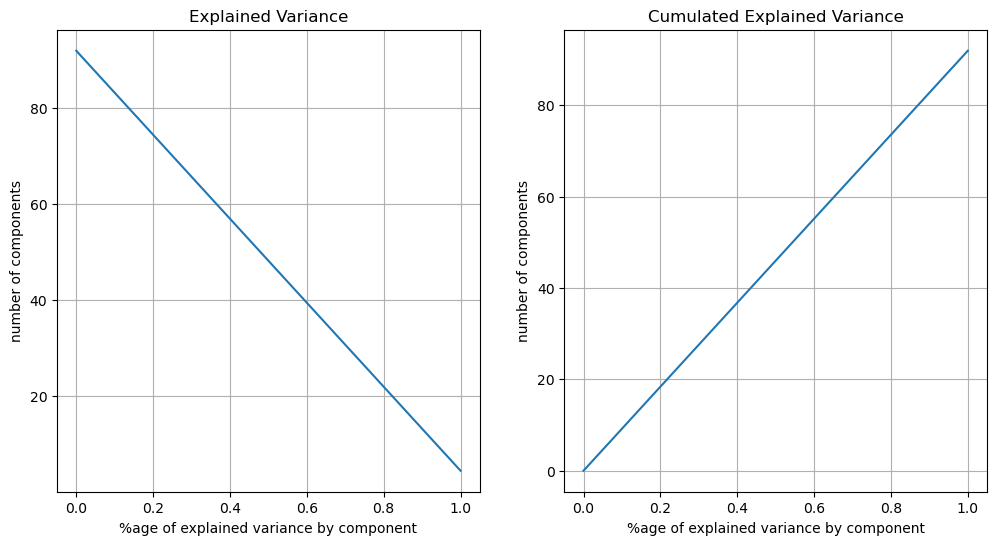

In [98]:
explained_variance_ratio = pca.explained_variance_ratio_

cumul_explained_variance_ratio = np.array([ np.sum(explained_variance_ratio[:i]) for i in range(len(explained_variance_ratio)) ])

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].plot(explained_variance_ratio*100)
ax[0].set_title('Explained Variance')
ax[0].set_xlabel('%age of explained variance by component')
ax[0].set_ylabel("number of components")
ax[0].grid(True)

ax[1].plot(cumul_explained_variance_ratio*100)
ax[1].set_title('Cumulated Explained Variance')
ax[1].set_xlabel('%age of explained variance by component')
ax[1].set_ylabel("number of components")
ax[1].grid(True)

### Some clustering

In [99]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [100]:
X_pca.shape

(106, 2)

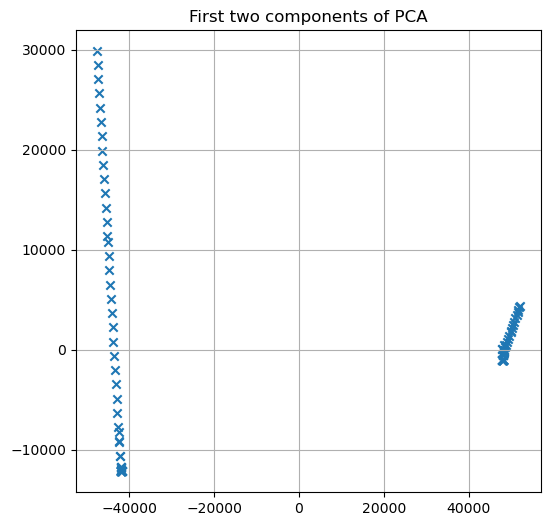

In [101]:
fig, ax = plt.subplots(figsize=(6,6))

ax.scatter( X_pca[:,0], X_pca[:,1], marker='x' )
ax.set_title('First two components of PCA')
ax.grid(True)